In [1]:
import rospy
from nav_msgs.msg import OccupancyGrid, Odometry
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def callback(data):
    occ = np.array(data.data).reshape(data.info.height, data.info.width)
    np.save('occupancy.npy', occ)
    # print('asdf')

def callback2(data):
    # occ = np.array(data.data).reshape(data.info.height, data.info.width)
    # np.save('occupancy.npy', occ)
    print('fdsa')


    # In ROS, nodes are uniquely named. If two nodes with the same
    # name are launched, the previous one is kicked off. The
    # anonymous=True flag means that rospy will choose a unique
    # name for our 'listener' node so that multiple listeners can
    # run simultaneously.

rospy.init_node('listener', anonymous=True)
# rospy.Subscriber('t265/odom/sample', Odometry, callback2)
rospy.Subscriber('occupancy', OccupancyGrid, callback)

# print('haha')

# spin() simply keeps python from exiting until this node is stopped
# rospy.spin()

In [3]:
listener()

NameError: name 'listener' is not defined

In [4]:
occ = np.load('occupancy.npy')
occ2 = np.copy(occ)
occ2[occ2 == -1] = 0

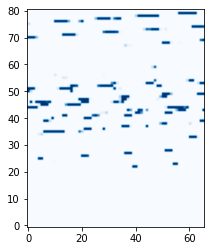

In [5]:
from scipy.ndimage import gaussian_filter

plt.imshow(occ2, cmap='Blues', origin='lower')

In [13]:
import rospy
from std_msgs.msg import String
def talker():
    pub = rospy.Publisher('chatter', String, queue_size=10)
    rospy.init_node('talker', anonymous=True)
    rate = rospy.Rate(10) # 10hz
    while not rospy.is_shutdown():
        hello_str = "hello world %s" % rospy.gect_time()
        rospy.loginfo(hello_str)
        pub.publish(hello_str)
        rate.sleep()


In [9]:
rospy.get_published_topics()

[['/d400/depth/image_rect_raw/compressed', 'sensor_msgs/CompressedImage'],
 ['/t265/realsense2_camera_manager/bond', 'bond/Status'],
 ['/d400/infra2/image_rect_raw/compressedDepth',
  'sensor_msgs/CompressedImage'],
 ['/d400/depth/image_rect_raw/theora/parameter_updates',
  'dynamic_reconfigure/Config'],
 ['/d400/aligned_depth_to_color/image_raw/theora/parameter_updates',
  'dynamic_reconfigure/Config'],
 ['/d400/gyro/imu_info', 'realsense2_camera/IMUInfo'],
 ['/d400/color/image_raw/compressed/parameter_updates',
  'dynamic_reconfigure/Config'],
 ['/occupancy', 'nav_msgs/OccupancyGrid'],
 ['/d400/aligned_depth_to_infra1/image_raw/compressedDepth',
  'sensor_msgs/CompressedImage'],
 ['/t265/accel/sample', 'sensor_msgs/Imu'],
 ['/d400/infra1/image_rect_raw/theora', 'theora_image_transport/Packet'],
 ['/d400/color/image_raw/compressed', 'sensor_msgs/CompressedImage'],
 ['/d400/depth/camera_info', 'sensor_msgs/CameraInfo'],
 ['/d400/pointcloud/parameter_descriptions',
  'dynamic_reconfigur

In [5]:
import skfmm
import numpy.ma as ma
import numpy as np
import matplotlib.pyplot as plt

In [30]:
a = 1 - np.eye(10)

# for _ in range(10000):
#     a[np.random.randint(3, 100), np.random.randint(3, 100)] = 0

b = ma.masked_values(a, 0)
b

masked_array(
  data=[[--, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --]],
  mask=[[ True, False, False, False, False, False, False, False, False,
         False],
        [False,  True, False, False, False, False, False, False, False,
         False],
        [False, False,  True, False, False, False, False, False, False,
         False],
        [False, False, False,  True, False, False, False, False, False,
         False],
        [False, False, False, False,  T

In [43]:
b[0,0] = 0
b[0, 1] = 0
b[1, 0] = 0
b[9, 9] = 0
b[8, 9] = 0
b[9, 8] = 0
b

masked_array(
  data=[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [0.0, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, --, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, --, 0.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]],
  mask=[[False, False, False, False, False, False, False, False, False,
         False],
        [False,  True, False, False, False, False, False, False, False,
         False],
        [False, False,  True, False, False, False, False, False, False,
         False],
        [False, False, False,  True, False, False, False, False, False,
         False],
        [False, False, False, False, 

masked_array(
  data=[[0.0, 0.0, 0.6666666666666666, 1.5555555555555556,
         2.5185185185185177, 3.506172839506172, 4.502057613168726,
         5.500685871056244, 6.500228623685416, 7.304814062019506],
        [0.0, --, 1.6666666666666665, 2.316032085580529,
         3.08285189035841, 3.9393356280713805, 4.849872386635389,
         5.79128186792577, 6.5764895491469275, 6.500228623685416],
        [0.6666666666666666, 1.6666666666666665, --, 3.2361909289221873,
         3.8147318978973574, 4.515515645145132, 5.316244104584668,
         6.054558111855545, 5.79128186792577, 5.500685871056244],
        [1.5555555555555556, 2.316032085580529, 3.2361909289221873, --,
         4.725358567077004, 5.267686790038022, 5.919867385149393,
         5.316244104584668, 4.849872386635389, 4.502057613168726],
        [2.5185185185185177, 3.08285189035841, 3.8147318978973574,
         4.725358567077004, --, 5.989815025793357, 5.267686790038022,
         4.515515645145132, 3.9393356280713805, 3.50617

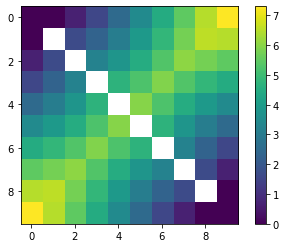

In [44]:
# for i in range(100):
c = skfmm.distance(b, dx=1)
plt.imshow(c)
plt.colorbar()
c

In [57]:
np.minimum(0, np.inf)

0.0

In [8]:
from fmm import FMMPlanner
import numpy as np

p = FMMPlanner(1 - np.eye(10))
(p.set_multi_goal((1 - np.eye(10)) == 0)) ** 2


array([[ 0. ,  0.5,  2. ,  4.5,  8. , 12.5, 18. , 24.5, 32. , 40.5],
       [ 0.5,  0. ,  0.5,  2. ,  4.5,  8. , 12.5, 18. , 24.5, 32. ],
       [ 2. ,  0.5,  0. ,  0.5,  2. ,  4.5,  8. , 12.5, 18. , 24.5],
       [ 4.5,  2. ,  0.5,  0. ,  0.5,  2. ,  4.5,  8. , 12.5, 18. ],
       [ 8. ,  4.5,  2. ,  0.5,  0. ,  0.5,  2. ,  4.5,  8. , 12.5],
       [12.5,  8. ,  4.5,  2. ,  0.5,  0. ,  0.5,  2. ,  4.5,  8. ],
       [18. , 12.5,  8. ,  4.5,  2. ,  0.5,  0. ,  0.5,  2. ,  4.5],
       [24.5, 18. , 12.5,  8. ,  4.5,  2. ,  0.5,  0. ,  0.5,  2. ],
       [32. , 24.5, 18. , 12.5,  8. ,  4.5,  2. ,  0.5,  0. ,  0.5],
       [40.5, 32. , 24.5, 18. , 12.5,  8. ,  4.5,  2. ,  0.5,  0. ]])

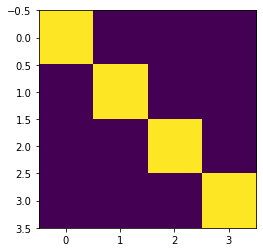

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(np.eye(4))